In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn
import statsmodels.api as sm
%matplotlib inline

In [2]:
#download Energy and Water Data Disclosure for Local Law 84 (2013)
APIendPoint = 'https://data.cityofnewyork.us/resource/m46j-75iy.csv' 
nrg = pd.read_csv(APIendPoint)
nrg.head()

,automatic_water_benchmarking_eligible,bbls_co_reported,borough,co_reported_bbl_status,direct_ghg_emissions_mtco2e,dof_benchmarking_submission_status,dof_number_of_buildings,dof_property_floor_area_buildngs_and_parking_ft2,energy_star_score,indirect_ghg_emissions_mtco2e,...,reported_property_floor_area_building_s_ft,reported_water_method,site_eui_kbtu_ft2,source_eui_kbtu_ft2,street_name,street_number,total_ghg_emissions_mtco2e,weather_normalized_site_eui_kbtu_ft2,weather_normalized_source_eui_kbtu_ft2,zip_code
0,NaN,1000410001,Manhattan,NaN,NaN,BBL not valid,NaN,NaN,Not Available,NaN,...,918919,NaN,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN
1,Yes,NaN,Queens,NaN,NaN,No Submission Matched to BBL,1.0,82730.0,NaN,NaN,...,NaN,None,NaN,NaN,108 STREET,63-10,NaN,NaN,NaN,11375.0
2,NaN,2027620097,Bronx,NaN,NaN,BBL not valid,NaN,NaN,Not Available,NaN,...,64200,NaN,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN
3,No,NaN,Manhattan,NaN,NaN,No Submission Matched to BBL,1.0,440360.0,NaN,NaN,...,NaN,None,NaN,NaN,11 AVENUE,201,NaN,NaN,NaN,10001.0
4,NaN,2048300034,Bronx,NaN,NaN,Not on Covered Buildings List,NaN,NaN,Not Available,NaN,...,50000,None,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN


In [ ]:
os.getenv("PUIDATA")

In [ ]:
#download pluto data
plutoVersion = 'mappluto_16v1.zip'
plutoURL = 'https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/'  
os.system("wget " + plutoURL + plutoVersion)


In [3]:
#read building size from pluto shape
bsize = gpd.read_file(os.getenv("PUIDATA") + "/Manhattan/MNMapPLUTO.shp")
bsize.head()

,APPBBL,APPDate,Address,AllZoning1,AllZoning2,AreaSource,AssessLand,AssessTot,BBL,BldgArea,...,YearAlter2,YearBuilt,ZMCode,ZipCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,geometry
0,0.000000e+00,None,1592 2 AVENUE,C1-9/TA,None,2,468000.0,1435950.0,1.015450e+09,10885,...,0,1920,None,10028,C1-9,None,None,None,9a,"POLYGON ((997277.2344000041 221816.0936000049,..."
1,1.007230e+09,11/30/2006,263 9 AVENUE,C1-5/R8,None,2,539984.0,11879993.0,1.007238e+09,89203,...,0,1914,None,10001,R8,None,None,None,8d,"POLYGON ((984164.5626000017 211846.0703999996,..."
2,0.000000e+00,None,310 EAST 109 STREET,R7A,None,2,140102.0,343271.0,1.016800e+09,12000,...,0,1910,None,10029,R7A,None,None,None,6b,"POLYGON ((1000742.195800006 227910.6640000045,..."
3,0.000000e+00,None,720 PARK AVENUE,R10/PI/LH-1A,R8B,2,5040000.0,30591900.0,1.013850e+09,203490,...,2006,1928,None,10021,R10,R8B,None,None,8c,"POLYGON ((994007.6886000037 219880.428399995, ..."
4,0.000000e+00,None,3 WEST 83 STREET,R8B,R10A,2,437850.0,1267200.0,1.011970e+09,13839,...,0,1900,None,10024,R8B,R10A,None,None,5d,"POLYGON ((992273.6850000024 224863.4904000014,..."


In [4]:
print nrg.columns
nrg.rename(columns={'nyc_borough_block_and_lot_bbl': 'BBL'}, inplace=True)
print nrg.columns


Index([u'automatic_water_benchmarking_eligible', u'bbls_co_reported',
       u'borough', u'co_reported_bbl_status', u'direct_ghg_emissions_mtco2e',
       u'dof_benchmarking_submission_status', u'dof_number_of_buildings',
       u'dof_property_floor_area_buildngs_and_parking_ft2',
       u'energy_star_score', u'indirect_ghg_emissions_mtco2e',
       u'municipally_supplied_potable_water_indoor_intensity_gal_ft',
       u'nyc_borough_block_and_lot_bbl',
       u'primary_property_type_self_selected', u'record_number',
       u'reported_nyc_building_identificaiton_numbers_bins',
       u'reported_property_floor_area_building_s_ft', u'reported_water_method',
       u'site_eui_kbtu_ft2', u'source_eui_kbtu_ft2', u'street_name',
       u'street_number', u'total_ghg_emissions_mtco2e',
       u'weather_normalized_site_eui_kbtu_ft2',
       u'weather_normalized_source_eui_kbtu_ft2', u'zip_code'],
      dtype='object')
Index([u'automatic_water_benchmarking_eligible', u'bbls_co_reported',
       u'

In [5]:
#Keep
#Energy 
## BBL
## site_eui_kbtu_ft2  
##  The Site Energy Use Intensity (EUI), as calculated by Portfolio Manager, at the property site. This
##equals the amount of energy consumed at the site in thousand British thermal units (kBtus) per gross square
##foot (kBtu/ft2) of the property. Site EUI values are the result of self-reported entries.

## reported_property_floor_area_building_s_ft
## Self-reported total gross square footage (ft2) of the property.


nrg['siteEUI'] = pd.to_numeric(nrg.site_eui_kbtu_ft2, errors = 'coerce')
nrg['floorArea']= pd.to_numeric(nrg.reported_property_floor_area_building_s_ft, errors = 'coerce')
nrg = nrg.copy().loc[:,['BBL','siteEUI','floorArea']]
nrg.head()


,BBL,siteEUI,floorArea
0,1.000410e+09,NaN,918919.0
1,4.021460e+09,NaN,NaN
2,2.027620e+09,NaN,64200.0
3,1.006700e+09,NaN,NaN
4,2.048300e+09,NaN,50000.0


In [6]:
nrg['totalEnergy'] = nrg.siteEUI * nrg.floorArea
nrg.drop(['siteEUI','floorArea'], axis = 1, inplace=True)
nrg.head()

,BBL,totalEnergy
0,1.000410e+09,NaN
1,4.021460e+09,NaN
2,2.027620e+09,NaN
3,1.006700e+09,NaN
4,2.048300e+09,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfe73366d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fcff6efe4d0>]], dtype=object)

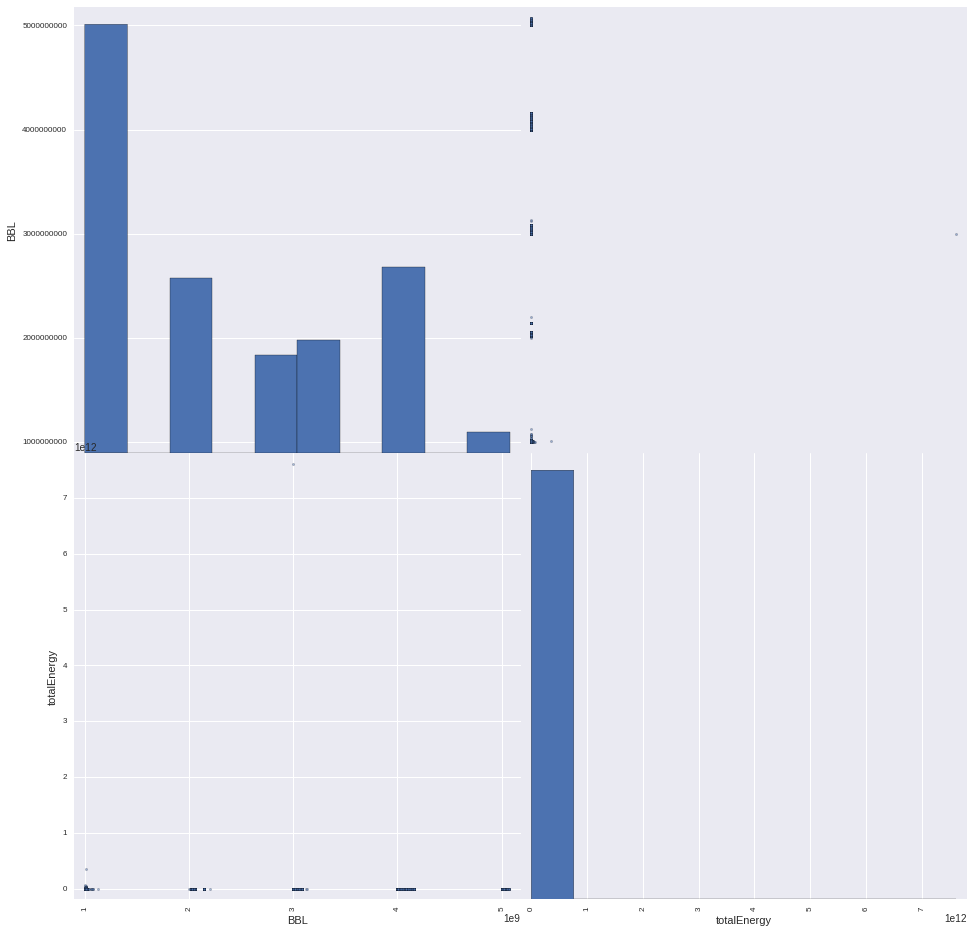

In [7]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(nrg, figsize=(16, 16))

In [8]:
#bsize = bsize.loc[:,['BBL','UnitsTotal']]
#few units non residential could have an extraordinary energy consumption,
bsize = bsize.loc[:,['BBL','UnitsRes']]
bsize.columns = ['BBL','Units']
bsize.head()

,BBL,Units
0,1.015450e+09,16
1,1.007238e+09,50
2,1.016800e+09,10
3,1.013850e+09,29
4,1.011970e+09,26


In [9]:
print bsize.shape
print nrg.shape

(42697, 2)
(16170, 2)


In [10]:
#merge data sets by BBL keeping all rows from the energy data set
bblnrgdata = pd.merge(left = nrg, right=bsize, how = 'left', on = 'BBL')
bblnrgdata.shape

(16170, 3)

(1000, 10000000000.0)

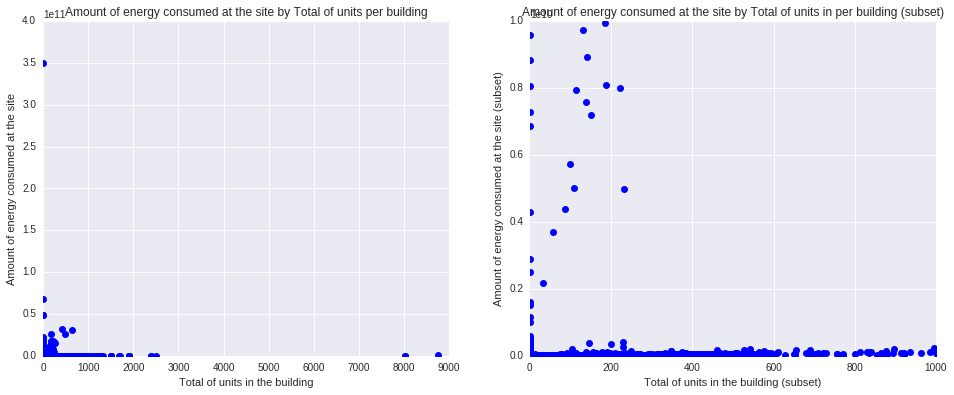

In [11]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(1,2,1)
ax.plot(bblnrgdata.Units,bblnrgdata.totalEnergy,'bo')
ax.set_title('Amount of energy consumed at the site by Total of units per building')
ax.set_xlabel('Total of units in the building')
ax.set_ylabel('Amount of energy consumed at the site')

ax2 = fig.add_subplot(1,2,2)
ax2.plot(bblnrgdata.Units,bblnrgdata.totalEnergy,'bo')
ax2.set_title('Amount of energy consumed at the site by Total of units in per building (subset)')
ax2.set_xlabel('Total of units in the building (subset)')
ax2.set_ylabel('Amount of energy consumed at the site (subset)')

ax2.set_xlim(1,1000)
ax2.set_ylim(1000,1e10)

In [12]:
#rmeove NaNs for every colum
print bblnrgdata.shape
bblnrgdata.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
print bblnrgdata.shape

(16170, 3)
(5069, 3)


In [13]:
#see distribution of values
print bblnrgdata.Units.describe()
print bblnrgdata.totalEnergy.describe()

count    5069.000000
mean       99.613928
std       255.911259
min         0.000000
25%         0.000000
50%        54.000000
75%       113.000000
max      8759.000000
Name: Units, dtype: float64
count    5.069000e+03
mean     2.136455e+08
std      5.245490e+09
min      0.000000e+00
25%      5.865608e+06
50%      9.347373e+06
75%      1.905119e+07
max      3.501452e+11
Name: totalEnergy, dtype: float64


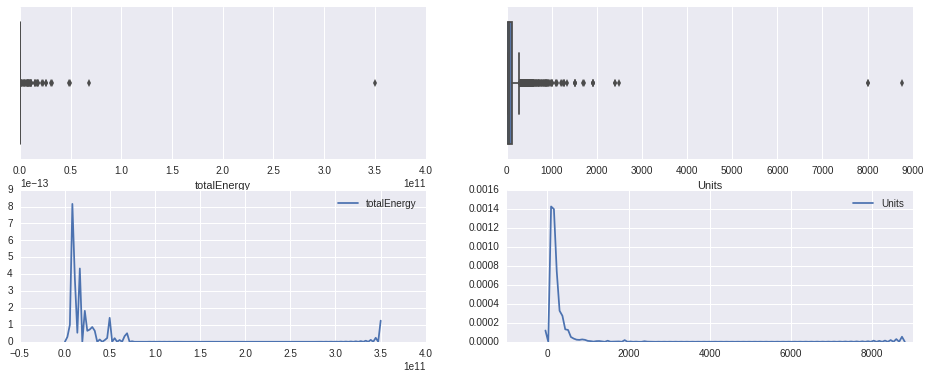

In [14]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(2,2,1)
ax = seaborn.boxplot(bblnrgdata.totalEnergy)

ax2 = fig.add_subplot(2,2,2)
ax2 = seaborn.boxplot(bblnrgdata.Units)

ax3 = fig.add_subplot(2,2,3)
ax3 = seaborn.kdeplot(bblnrgdata.totalEnergy)

ax4 = fig.add_subplot(2,2,4)
ax4 = seaborn.kdeplot(bblnrgdata.Units)


In [ ]:
nrgMaskQ = (bblnrgdata.totalEnergy > 1000) & (bblnrgdata.totalEnergy < bblnrgdata.totalEnergy.quantile(.99))
unitsMaskQ = (bblnrgdata.Units> 0) & (bblnrgdata.Units < bblnrgdata.Units.quantile(.99))


In [ ]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(2,2,1)
ax = seaborn.boxplot(bblnrgdata.totalEnergy[nrgMaskQ])

ax2 = fig.add_subplot(2,2,2)
ax2 = seaborn.boxplot(bblnrgdata.Units[unitsMaskQ])

ax3 = fig.add_subplot(2,2,3)
ax3 = seaborn.kdeplot(bblnrgdata.totalEnergy[nrgMaskQ])

ax4 = fig.add_subplot(2,2,4)
ax4 = seaborn.kdeplot(bblnrgdata.Units[unitsMaskQ])

In [ ]:
#see distribution of values after outlier removal
print bblnrgdata.Units[unitsMaskQ].describe()
print bblnrgdata.totalEnergy[nrgMaskQ].describe()

In [ ]:
joinMasks = unitsMaskQ & nrgMaskQ
print sum(joinMasks)
plt.plot(bblnrgdata.Units[joinMasks],bblnrgdata.totalEnergy[joinMasks],'ro')

In [ ]:
#create log for each variable
bblnrgdata['logUnits'] = np.log10(bblnrgdata.Units[joinMasks])
bblnrgdata['logTotalEnergy'] = np.log10(bblnrgdata.totalEnergy[joinMasks])
bblnrgdata.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [ ]:
#Plot data
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(1,2,1)
ax.plot(bblnrgdata.logUnits,bblnrgdata.logTotalEnergy,'bo')
ax.set_title('Log of total energy consumed at the site by log of total of units per building')
ax.set_xlabel('Units in the building (Log)')
ax.set_ylabel('Amount of energy consumed at the site (Log)')


In [ ]:
#test for units as independent
x = sm.add_constant(bblnrgdata.logUnits)
y = bblnrgdata.logTotalEnergy
lm = sm.OLS(y,x,missing='drop').fit()
print lm.summary()

In [ ]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(1,2,1)
ax.plot(x,y,'bo')
ax.plot([0,3.5],[lm.params[0],lm.params[0] + 3.5 * lm.params[1]],'r')
ax.set_title('Log of total energy consumed at the site by log of total of units per building')
ax.set_xlabel('Total of units in the building (Log)')
ax.set_ylabel('Amount of energy consumed at the site (Log)')


In [ ]:
#test for energy as independent
x = sm.add_constant(bblnrgdata.logTotalEnergy)
y = bblnrgdata.logUnits
lm = sm.OLS(y,x,missing='drop').fit()
print lm.summary()

In [ ]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(1,2,1)
ax.plot(x,y,'bo')
ax.plot([1,10],[lm.params[0],lm.params[0] + 10 * lm.params[1]],'r')
ax.set_title('Log of total energy consumed at the site by log of total of units per building')
ax.set_xlabel('Total of units in the building (Log)')
ax.set_ylabel('Amount of energy consumed at the site (Log)')
